In [1]:
import numpy
from matplotlib import pyplot, cm, rcParams
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
%matplotlib inline
rcParams['font.size'] = 16

In [50]:
# problem parameters
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

l1_target = 1e-6

u = 1

def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [65]:
# function to solve using Jacobi
def jacobi(w,ksi,dy,u,l1_target):
    """Iteratively solves the Laplace equation using the Jacobi method
    
    Parameters:
    -----------
    p: 2D array of float
        Initial potential distribution
    l2_target: float
        target for the difference between consecutive solutions
        
    Returns:
    --------
    p: 2D array of float
        Potential distribution after relaxation
    """
    l1norm = 1
    wn = numpy.empty_like(w)
    ksin = numpy.empty_like(ksi)
    iterations = 0
    #for i in range(0,100):
    while l1norm > l1_target:
        wn = w.copy()
        ksin = ksi.copy()
        
        w[1:-1,1:-1] = 0.25*(wn[1:-1,2:] + wn[1:-1,:-2] \
                            + wn[2:,1:-1] + wn[:-2,1:-1])
        
        
        ksi[1:-1,1:-1] = 0.25*(ksin[1:-1,2:] + ksin[1:-1,:-2] \
                            + ksin[2:,1:-1] + ksin[:-2,1:-1] + wn[1:-1,1:-1]*dy**2)
        
        # Dirichlet B.C. for ksi, should be automatic
        #ksi[:,0] = 0 #left side
        #ksi[:,-1] = 0 #right side
        #ksi[-1,:] = 0 #top side
        #ksi[0,:] = 0 #bottom side
                               
        # Dirichlet B.C. for w
        w[1:-1,0] = -1/(2*dy**2)*(8*ksi[1:-1,1] - ksi[1:-1,2]) # left side
        w[1:-1,-1] = -1/(2*dy**2)*(8*ksi[1:-1,-2] - ksi[1:-1,-3]) # right side
        w[0,1:-1] = -1/(2*dy**2)*(8*ksi[1,1:-1] - ksi[2,1:-1]) # bottom side                       
        w[-1,1:-1] = -1/(2*dy**2)*(8*ksi[-2,1:-1] - ksi[-3,1:-1]) - 3*u/dy # top side                       
                               
        l1norm = max(L1norm(w,wn),L1norm(ksi,ksin))
        #ksi_l1norm = L1norm(ksi,ksin)
        #w_l1norm = L1norm(w,wn)
        #l1norm = max(ksi_l1norm,w_l1norm)
        
        #print('l1norm for w      l1norm for ksi')
        #print("{}          {}".format(w_l1norm,ksi_l1norm))
        iterations += 1
    print('Converged in {} iterations'.format(iterations))
    return w, ksi

In [66]:
wi = numpy.zeros((nx,ny))
ksii = numpy.zeros((nx,ny))

w, ksi = jacobi(wi.copy(),ksii.copy(),dy,u,l1_target)

Converged in 4060 iterations


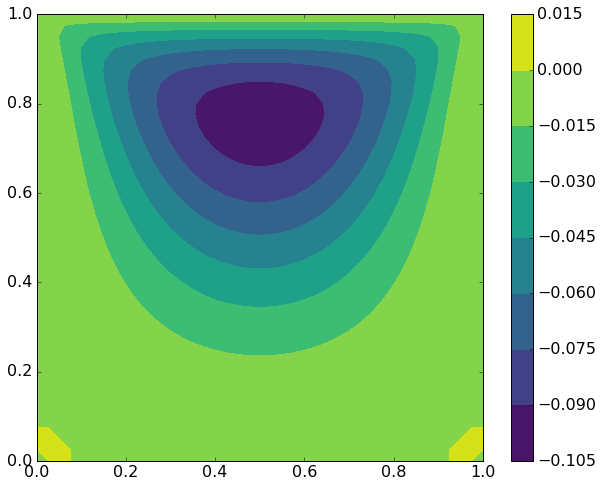

In [67]:
pyplot.figure(figsize=(10,8))
pyplot.contourf(x,y,ksi,cmap=cm.viridis);
pyplot.colorbar();

In [69]:
?pyplot.coutourf()

Object `pyplot.coutourf` not found.
